In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

# Data Loading

In [2]:
cols = ['anime_id', 'Name', 'Score', "Genres", "Synopsis", 'Type', 'Studios', 'Favorites', 'Rating', "Image URL"]

df_raw = pd.read_csv("./anime-dataset-2023.csv", sep=",", usecols=cols, index_col=None)
df_raw

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,Sunrise,R - 17+ (violence & profanity),78525,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,Bones,R - 17+ (violence & profanity),1448,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,Madhouse,PG-13 - Teens 13 or older,15035,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,Sunrise,PG-13 - Teens 13 or older,613,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,Toei Animation,PG - Children,14,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,UNKNOWN,PG-13 - Teens 13 or older,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,UNKNOWN,PG-13 - Teens 13 or older,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,UNKNOWN,PG-13 - Teens 13 or older,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,UNKNOWN,PG-13 - Teens 13 or older,0,https://cdn.myanimelist.net/images/anime/1931/...


# EDA

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anime_id   24905 non-null  int64 
 1   Name       24905 non-null  object
 2   Score      24905 non-null  object
 3   Genres     24905 non-null  object
 4   Synopsis   24905 non-null  object
 5   Type       24905 non-null  object
 6   Studios    24905 non-null  object
 7   Rating     24905 non-null  object
 8   Favorites  24905 non-null  int64 
 9   Image URL  24905 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.9+ MB


In [4]:
df_raw.describe(include=["O"])

,Name,Score,Genres,Synopsis,Type,Studios,Rating,Image URL
count,24905,24905,24905,24905,24905,24905,24905,24905
unique,24901,567,1006,20113,7,1547,7,24720
top,Azur Lane,UNKNOWN,UNKNOWN,No description available for this anime.,TV,UNKNOWN,PG-13 - Teens 13 or older,https://cdn.myanimelist.net/img/sp/icon/apple-...
freq,2,9213,4929,4535,7597,10526,8502,186


In [5]:
df_raw.Rating.unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'UNKNOWN'], dtype=object)

In [6]:
df_raw[df_raw.Studios.str.contains("UNKNOWN|unknown") & ~df_raw.Score.str.contains("UNKNOWN")].sort_values(by="Score", ascending=False)

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL
21001,48653,Yoru ni Kakeru,8.36,UNKNOWN,"Music video of the song ""Yoru Ni Kakeru"" by Yo...",Music,UNKNOWN,PG-13 - Teens 13 or older,96,https://cdn.myanimelist.net/images/anime/1548/...
15248,39112,Kawaki wo Ameku,8.32,UNKNOWN,Music video for the song Kawaki wo Ameku by Mi...,Music,UNKNOWN,PG-13 - Teens 13 or older,190,https://cdn.myanimelist.net/images/anime/1776/...
23058,52846,Tot Musica,8.04,UNKNOWN,Music video for the song Tot Musica by Ado.,Music,UNKNOWN,PG-13 - Teens 13 or older,19,https://cdn.myanimelist.net/images/anime/1816/...
15295,39164,Dramaturgy,7.9,UNKNOWN,"An original song by Eve, sung by Hatsune Miku,...",Music,UNKNOWN,G - All Ages,33,https://cdn.myanimelist.net/images/anime/1876/...
16820,42076,Inochi no Tabekata,7.86,"Horror, Supernatural",Music video for Eve's song Inochi no Tabekata.,Music,UNKNOWN,R - 17+ (violence & profanity),22,https://cdn.myanimelist.net/images/anime/1422/...
...,...,...,...,...,...,...,...,...,...,...
11548,32894,Love Bites,2.59,Horror,"In accordance with a letter she received, a sc...",ONA,UNKNOWN,R - 17+ (violence & profanity),3,https://cdn.myanimelist.net/images/anime/3/788...
8594,22179,Aki no Puzzle,2.37,Avant Garde,"A short 6-minute movie, containing flashing li...",Movie,UNKNOWN,R+ - Mild Nudity,0,https://cdn.myanimelist.net/images/anime/10/73...
10984,31634,Kokuhaku,2.3,Horror,"Beside a certain building, a girl appears to m...",ONA,UNKNOWN,R - 17+ (violence & profanity),17,https://cdn.myanimelist.net/images/anime/9/762...
4194,5569,Tsui no Sora,2.22,Hentai,"After the sudden death of a student, mysteriou...",OVA,UNKNOWN,Rx - Hentai,24,https://cdn.myanimelist.net/images/anime/1179/...


In [7]:
df_raw.Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'UNKNOWN'],
      dtype=object)

In [8]:
df_raw[df_raw.Type.str.contains("ONA") & ~df_raw.Score.str.contains("UNKNOWN")].sort_values(by="Score", ascending=False)

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL
17913,44074,Shiguang Dailiren,8.72,"Drama, Supernatural",It is said that a picture is worth a thousand ...,ONA,LAN Studio,PG-13 - Teens 13 or older,9360,https://cdn.myanimelist.net/images/anime/1135/...
23341,53273,JoJo no Kimyou na Bouken Part 6: Stone Ocean P...,8.63,"Action, Adventure, Supernatural",After finally escaping the confines of Green D...,ONA,David Production,R - 17+ (violence & profanity),2447,https://cdn.myanimelist.net/images/anime/1233/...
16931,42310,Cyberpunk: Edgerunners,8.61,"Action, Sci-Fi","Dreams are doomed to die in Night City, a futu...",ONA,Trigger,R+ - Mild Nudity,19406,https://cdn.myanimelist.net/images/anime/1818/...
16047,40434,Mo Dao Zu Shi: Wanjie Pian,8.57,"Action, Adventure, Drama, Fantasy, Mystery","Along an empty road in the rural countryside, ...",ONA,B.CMAY PICTURES,R - 17+ (violence & profanity),1514,https://cdn.myanimelist.net/images/anime/1634/...
23318,53236,Road of Naruto,8.49,"Action, Fantasy","In celebration of 20 years of Naruto, Studio P...",ONA,Pierrot,PG-13 - Teens 13 or older,104,https://cdn.myanimelist.net/images/anime/1731/...
...,...,...,...,...,...,...,...,...,...,...
11014,31686,Shigeru,3.1,"Avant Garde, Comedy",Short animation by Sawako Kabuki.,ONA,UNKNOWN,R+ - Mild Nudity,4,https://cdn.myanimelist.net/images/anime/13/76...
7458,16608,Shitcom,2.76,"Comedy, Romance",A beautiful couple is enjoying a lovely dinner...,ONA,UNKNOWN,PG-13 - Teens 13 or older,52,https://cdn.myanimelist.net/images/anime/1093/...
11263,32294,Ai (ONA),2.63,Romance,The circumstances responsible for the person's...,ONA,UNKNOWN,G - All Ages,8,https://cdn.myanimelist.net/images/anime/3/774...
11548,32894,Love Bites,2.59,Horror,"In accordance with a letter she received, a sc...",ONA,UNKNOWN,R - 17+ (violence & profanity),3,https://cdn.myanimelist.net/images/anime/3/788...


In [9]:
df_raw['Image URL'].value_counts()

Image URL
https://cdn.myanimelist.net/img/sp/icon/apple-touch-icon-256.png    186
https://cdn.myanimelist.net/images/anime/4/19644.jpg                  1
https://cdn.myanimelist.net/images/anime/1132/106463.jpg              1
https://cdn.myanimelist.net/images/anime/1848/115946.jpg              1
https://cdn.myanimelist.net/images/anime/1229/117735.jpg              1
                                                                   ... 
https://cdn.myanimelist.net/images/anime/13/54101.jpg                 1
https://cdn.myanimelist.net/images/anime/12/54087.jpg                 1
https://cdn.myanimelist.net/images/anime/11/55531.jpg                 1
https://cdn.myanimelist.net/images/anime/1347/102594.jpg              1
https://cdn.myanimelist.net/images/anime/1902/136595.jpg              1
Name: count, Length: 24720, dtype: int64

In [14]:
df_raw[df_raw['Image URL'].str.contains("apple")].sort_values(by="Score")

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL
7626,17387,Imokawa Mukuzo: Genkanban no Maki,5.28,Comedy,The third professionally produced Japanese ani...,Movie,UNKNOWN,G - All Ages,2,https://cdn.myanimelist.net/img/sp/icon/apple-...
6343,10757,Kachikachi Yama,5.3,Drama,No description available for this anime.,Movie,UNKNOWN,G - All Ages,1,https://cdn.myanimelist.net/img/sp/icon/apple-...
6344,10758,Momotarou,5.44,Drama,An early anime telling the story of Momotarou ...,Movie,UNKNOWN,G - All Ages,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
8674,22511,Kobutori,5.59,Comedy,Based on the tale Kobutori-jiisan about an hon...,Movie,UNKNOWN,G - All Ages,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
8836,23189,Dekobou Shingachou: Meian no Shippai,5.77,Comedy,A man first realizes he's born to be a samurai...,Movie,UNKNOWN,G - All Ages,10,https://cdn.myanimelist.net/img/sp/icon/apple-...
...,...,...,...,...,...,...,...,...,...,...
13006,35490,Tanukichi no Ohanashi,UNKNOWN,Fantasy,A story about a tanuki.,Movie,UNKNOWN,G - All Ages,1,https://cdn.myanimelist.net/img/sp/icon/apple-...
13007,35491,Kaeru wa Kaeru,UNKNOWN,UNKNOWN,No description available for this anime.,Movie,UNKNOWN,G - All Ages,1,https://cdn.myanimelist.net/img/sp/icon/apple-...
13009,35493,Chuukichi wa Kaetta,UNKNOWN,UNKNOWN,No description available for this anime.,Movie,UNKNOWN,G - All Ages,0,https://cdn.myanimelist.net/img/sp/icon/apple-...
13478,36322,Shippai Ippai mo Ikkai,UNKNOWN,UNKNOWN,An educational film aimed at lower elementary ...,OVA,UNKNOWN,G - All Ages,0,https://cdn.myanimelist.net/img/sp/icon/apple-...


NameError: name 'df_raw' is not defined

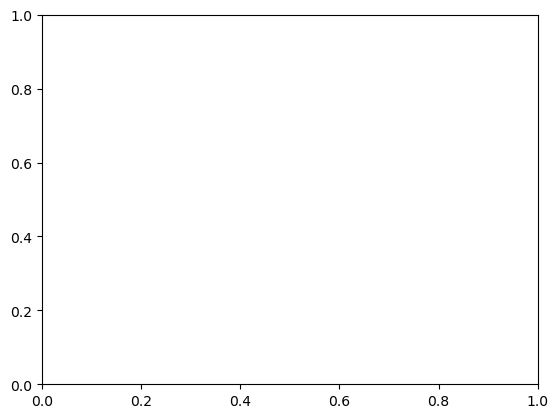

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the 'Tweet' column is in the df1_eda dataframe
# df_raw['Tweet'] = df1_eda['Tweet'].astype(str)

fig, ax = plt.subplots(1,1)
wc = WordCloud(width=800, height=400, background_color='white', max_words = 1000).generate(' '.join(df_raw['Synopsis']))
ax.imshow(wc, interpolation="bilinear")

plt.show()

# Data Cleaning

In [97]:
df_clean = df_raw.copy()

# removing null/unknown and records with no synopsis (which mostly are anime ads/mv)
df_clean.loc[:,["Synopsis", "Genres", "Studios", "Score"]] = df_clean.loc[:,["Synopsis", "Genres", "Studios", "Score"]].replace({r".*UNKNOWN.*":None, r"^[Nn]o [Dd]esc.*":None}, regex=True)
df_clean.loc[:,"Type"] = df_clean.loc[:,"Type"].replace({r"^[Mm]usic$":None}, regex=True)

# keep it safe, folks
df_clean.loc[:, "Rating"] = df_clean.loc[:, "Rating"].replace({r".*[Hh]entai.*":None}, regex=True)

# anime with empty cover
df_clean.loc[:,"Image URL"] = df_clean.loc[:,"Image URL"].replace({r".*apple-touch.*":None}, regex=True)

# Correcting data types
df_clean.dropna(inplace=True)
df_clean.Score = df_clean.Score.astype("double")

df_clean.reset_index(inplace=True, drop=True)

In [98]:
df_clean.sort_values(by="Score", ascending=False)

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL
3126,5114,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,Bones,R - 17+ (violence & profanity),217606,https://cdn.myanimelist.net/images/anime/1208/...
8908,41467,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,Pierrot,R - 17+ (violence & profanity),17999,https://cdn.myanimelist.net/images/anime/1908/...
4142,9253,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,White Fox,PG-13 - Teens 13 or older,182964,https://cdn.myanimelist.net/images/anime/1935/...
6266,28977,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,Bandai Namco Pictures,PG-13 - Teens 13 or older,15947,https://cdn.myanimelist.net/images/anime/3/720...
9123,43608,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.05,"Comedy, Romance",The elite members of Shuchiin Academy's studen...,TV,A-1 Pictures,PG-13 - Teens 13 or older,29118,https://cdn.myanimelist.net/images/anime/1160/...
...,...,...,...,...,...,...,...,...,...,...
4159,9342,Twinkle Nora Rock Me!,2.98,"Action, Sci-Fi","Based on a 1980 manga by Mikuriya Satomi, this...",OVA,Filmlink International,PG-13 - Teens 13 or older,13,https://cdn.myanimelist.net/images/anime/2/258...
8352,38853,Ex-Arm,2.90,"Action, Sci-Fi","After being hit by a truck in the year 2014, A...",TV,Visual Flight,PG-13 - Teens 13 or older,294,https://cdn.myanimelist.net/images/anime/1847/...
3325,5877,Abunai Sisters: Koko & Mika,2.53,"Action, Comedy, Ecchi",Computer-animated gag shorts about two female ...,OVA,Production I.G,R+ - Mild Nudity,40,https://cdn.myanimelist.net/images/anime/4/570...
376,413,Hametsu no Mars,2.22,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,WAO World,R - 17+ (violence & profanity),295,https://cdn.myanimelist.net/images/anime/7/688...


# Data Preprocessing

## 1st checkpoint

In [70]:
try:
    df_prc = df_clean.copy()
    df_prc.to_csv("./clean_anime_data.csv", index=False)
except:
    df_prc = pd.read_csv("./clean_anime_data.csv")

In [71]:
from nltk.stem import PorterStemmer
import html, re, string
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stemmer = PorterStemmer()

def stem_tok(text, stem = True):
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = set(stopwords.words('indonesian'))  # Use 'indonesian' stopwords
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # lemmatize text
    if stem: text = [stemmer.stem(t) for t in text]
    # remove words with only one letter
    # text = [t for t in text if len(t) > 1]
    # # remove common noun (shows as top word across some category, but has no significant meaning in text; stopwords)
    # text = [word for word in text if (word not in ['orang', "nya", "si", "banget", "tuh", "sih", "nih"]) and (len(word) > 2)]
    # join all
    text = " ".join(text)

    return text

def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # Remove special characters in the middle of words
    text = re.sub(r'(?<!\s)[?\'](?!\s)', '', text)
    # Remove extra newline
    text = re.sub(r'\\n', ' ', text)
    # Remove escape sequence
    text = re.sub(r'\\\S*', ' ', text)
    # Remove extra whitespaces and unescaped characters
    text = re.sub(r'\\[a-zA-Z0-9]+', '', text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    # text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # Remove Hashtag
    text = re.sub(r'\#\S*', '', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    # lower text
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+|\S*url\S*|\S*(?:\.com|\.co|\.org)\S*', '', text, flags=re.MULTILINE)
    # Remove plurals
    text = re.sub(r'\b(\w+)(-\1)+\b', r'\1', text)
    # Remove punctuations
    text = re.sub(r'[^0-9\w\d\s]', ' ', text)

    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df_prc["Clean Synopsis"] = df_prc['Synopsis'].apply(clean).apply(lambda x: stem_tok(x, False))

In [73]:
df_prc['Clean Genres'] = df_prc['Genres'].apply(lambda x: " ".join([word.strip(".,") for word in x.split()]))

In [74]:
df_prc['Clean Title'] = df_prc['Name'].apply(lambda x: re.sub(r"[\.\,\:\-\;\'\"\\\/\[\]\{\}\+\=\_\)\(\*\&\^\%\$\#\@\!]", " ", x).lower())

In [75]:
df_prc['Content'] = df_prc["Clean Synopsis"] + df_prc['Clean Genres']

In [77]:
df_prc.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL,Clean Synopsis,Clean Genres,Clean Title,Content
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,Sunrise,R - 17+ (violence & profanity),78525,https://cdn.myanimelist.net/images/anime/4/196...,crime is timeless by the year humanity has exp...,Action Award Winning Sci-Fi,cowboy bebop,crime is timeless by the year humanity has exp...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,Bones,R - 17+ (violence & profanity),1448,https://cdn.myanimelist.net/images/anime/1439/...,another day another bounty such is the life of...,Action Sci-Fi,cowboy bebop tengoku no tobira,another day another bounty such is the life of...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,Madhouse,PG-13 - Teens 13 or older,15035,https://cdn.myanimelist.net/images/anime/7/203...,vash the stampede is the man with a bounty on ...,Action Adventure Sci-Fi,trigun,vash the stampede is the man with a bounty on ...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,Sunrise,PG-13 - Teens 13 or older,613,https://cdn.myanimelist.net/images/anime/10/19...,robin sena is a powerful craft user drafted in...,Action Drama Mystery Supernatural,witch hunter robin,robin sena is a powerful craft user drafted in...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,Toei Animation,PG - Children,14,https://cdn.myanimelist.net/images/anime/7/215...,it is the dark century and the people are suff...,Adventure Fantasy Supernatural,bouken ou beet,it is the dark century and the people are suff...


# EDA Post-Preprocessing

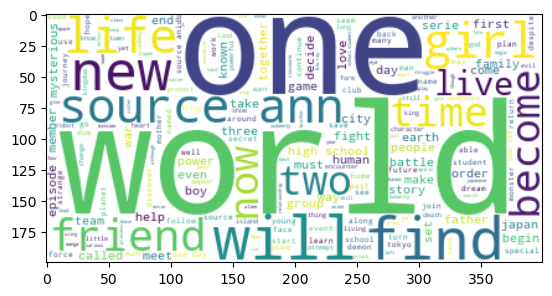

In [240]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white').generate(" ".join(df_prc['Clean Synopsis']))

fig, ax = plt.subplots(1,1)
ax.imshow(wc, interpolation='bilinear')
plt.show()

In [244]:
dump =df_prc.loc[df_prc['Clean Synopsis'].str.contains(r'\bann\b'), ['Clean Synopsis']]

# Representation

## 2nd checkpoint

In [80]:
try:
    df_final = df_prc.copy()
    df_final.to_csv("./preprocessed_anime_data.csv", index=False)
except:
    df_final = pd.read_csv("./preprocessed_anime_data.csv")

df_final.head()

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL,Clean Synopsis,Clean Genres,Clean Title,Content
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,Sunrise,R - 17+ (violence & profanity),78525,https://cdn.myanimelist.net/images/anime/4/196...,crime is timeless by the year humanity has exp...,Action Award Winning Sci-Fi,cowboy bebop,crime is timeless by the year humanity has exp...
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,Bones,R - 17+ (violence & profanity),1448,https://cdn.myanimelist.net/images/anime/1439/...,another day another bounty such is the life of...,Action Sci-Fi,cowboy bebop tengoku no tobira,another day another bounty such is the life of...
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,Madhouse,PG-13 - Teens 13 or older,15035,https://cdn.myanimelist.net/images/anime/7/203...,vash the stampede is the man with a bounty on ...,Action Adventure Sci-Fi,trigun,vash the stampede is the man with a bounty on ...
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,Sunrise,PG-13 - Teens 13 or older,613,https://cdn.myanimelist.net/images/anime/10/19...,robin sena is a powerful craft user drafted in...,Action Drama Mystery Supernatural,witch hunter robin,robin sena is a powerful craft user drafted in...
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,Toei Animation,PG - Children,14,https://cdn.myanimelist.net/images/anime/7/215...,it is the dark century and the people are suff...,Adventure Fantasy Supernatural,bouken ou beet,it is the dark century and the people are suff...


## Title

In [194]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer()

tfidf_title = tfidf_vec.fit_transform(df_final['Clean Title'])
similarity_title = cosine_similarity(tfidf_title)

In [195]:
np.argsort(similarity_title[0])[::-1]

array([   0, 5279,    1, ..., 6665, 6664, 5000], dtype=int64)

In [196]:
df_final.loc[np.argsort(similarity_title[1])[:-10:-1], "Name"]

1        Cowboy Bebop: Tengoku no Tobira
0                           Cowboy Bebop
5279    Cowboy Bebop: Ein no Natsuyasumi
2811     Cowboy Bebop: Yose Atsume Blues
2138                   Natsu e no Tobira
9922                   Tengoku Daimakyou
2463                     Tobira wo Akete
4563    Game Tengoku: The Game Paradise!
1671              Tobira wo Akete (1995)
Name: Name, dtype: object

## Content = Synopsis + Genres

In [197]:
tfidf_vec = TfidfVectorizer()

tfidf_content = tfidf_vec.fit_transform(df_final['Content'])

similarity_content = cosine_similarity(tfidf_content)

In [198]:
df_final.loc[np.argsort(similarity_content[5279])[:-10:-1], "Name"]

5279                   Cowboy Bebop: Ein no Natsuyasumi
399                               Phantom The Animation
7880                                         Grand Blue
0                                          Cowboy Bebop
1                       Cowboy Bebop: Tengoku no Tobira
100                                 Fullmetal Alchemist
392     Fullmetal Alchemist: The Conqueror of Shamballa
6017            Tamayura: More Aggressive Picture Drama
2811                    Cowboy Bebop: Yose Atsume Blues
Name: Name, dtype: object

## Final

In [199]:
similarity_fin = similarity_content*0.9 + similarity_title*0.1
# similarity_fin = np.maximum(similarity_content, similarity_title)

similarity_fin

array([[1.        , 0.30708023, 0.08903036, ..., 0.02523901, 0.01884569,
        0.02391773],
       [0.30708023, 1.        , 0.08964359, ..., 0.03890044, 0.02105142,
        0.01151419],
       [0.08903036, 0.08964359, 1.        , ..., 0.03825269, 0.01978152,
        0.04445802],
       ...,
       [0.02523901, 0.03890044, 0.03825269, ..., 1.        , 0.1922183 ,
        0.07050271],
       [0.01884569, 0.02105142, 0.01978152, ..., 0.1922183 , 1.        ,
        0.01878053],
       [0.02391773, 0.01151419, 0.04445802, ..., 0.07050271, 0.01878053,
        1.        ]])

In [ ]:
try:
    similarity_fin = similarity_content*0.9 + similarity_title*0.1
    pd.DataFrame(similarity_fin).to_csv("similarity_matrix.csv")
except:
    similarity_fin = pd.read_csv

df_final.head()

# Recommendations

In [188]:
def find_anime_index(data : pd.DataFrame, id : int):
    idx = data.index[data['anime_id'] == id].to_list()

    if not idx:
        raise ValueError("Couldn't find given id or name.")
        
    return idx[0]

def find_anime_id(data : pd.DataFrame, title : str, first : bool = True):
    if title is None:
        raise ValueError("Title cannot be empty string.")

    id = data.loc[data['Clean Title'].str.contains(title.lower()), "anime_id"].to_list()
        
    if first:
        return id[0]
    else:
        return id   
    
def recommend(data :pd.DataFrame, mat : np.ndarray, id : int = None, count = 10, title : str = None):
    if id is None:
        id = find_anime_id(data, title)

    idx = find_anime_index(data, id = id)
    
    return pd.DataFrame({"id" : data.loc[np.argsort(mat[idx])[:-count-1:-1], "anime_id"],"title" : data.loc[np.argsort(mat[idx])[:-count-1:-1], "Name"], "similarity":np.sort(mat[idx])[:-count-1:-1]},).reset_index(drop=True)

In [189]:
recommend(df_final, similarity_fin, title = "gundam")

,id,title,similarity
0,80,Kidou Senshi Gundam,1.000000
1,1090,Kidou Senshi Gundam I,0.684276
2,41063,Kidou Senshi Gundam G40,0.416072
3,85,Kidou Senshi Zeta Gundam,0.404907
4,92,Kidou Shinseiki Gundam X,0.390535
5,82,Kidou Senshi Gundam 0080: Pocket no Naka no Se...,0.388327
6,87,Kidou Senshi Gundam: Gyakushuu no Char,0.380784
7,81,Kidou Senshi Gundam: Dai 08 MS Shoutai,0.375703
8,86,Kidou Senshi Gundam ZZ,0.372447
9,39592,Kidou Senshi Gundam: The Origin - Zenya Akai S...,0.363627


In [190]:
df_final[df_final['anime_id'] == 27787]

,anime_id,Name,Score,Genres,Synopsis,Type,Studios,Rating,Favorites,Image URL,Clean Synopsis,Clean Genres,Clean Title,Content
6153,27787,Nisekoi:,7.35,"Comedy, Romance",Despite having seemingly quelled the war betwe...,TV,Shaft,PG-13 - Teens 13 or older,1806,https://cdn.myanimelist.net/images/anime/13/72...,despite having seemingly quelled the war betwe...,Comedy Romance,nisekoi,despite having seemingly quelled the war betwe...


In [191]:
recommend(df_final, similarity_content, title="Fate", count = 20)

,id,title,similarity
0,356,Fate/stay night,1.000000
1,25537,Fate/stay night Movie: Heaven's Feel - I. Pres...,0.484760
2,22297,Fate/stay night: Unlimited Blade Works,0.404233
3,34100,Fate/kaleid liner Prisma☆Illya Movie: Sekka no...,0.391720
4,33049,Fate/stay night Movie: Heaven's Feel - II. Los...,0.356290
5,10087,Fate/Zero,0.323031
6,34662,Fate/Apocrypha,0.322447
7,28701,Fate/stay night: Unlimited Blade Works 2nd Season,0.304781
8,11741,Fate/Zero 2nd Season,0.280399
9,6922,Fate/stay night Movie: Unlimited Blade Works,0.279278


In [161]:
pd.DataFrame(similarity_fin).to_csv("similarity_matrix.csv")

In [204]:
np.save(file="similarity_matrix", arr=similarity_fin)

In [205]:
np.load(file="similarity_matrix.npy")

array([[1.        , 0.30708023, 0.08903036, ..., 0.02523901, 0.01884569,
        0.02391773],
       [0.30708023, 1.        , 0.08964359, ..., 0.03890044, 0.02105142,
        0.01151419],
       [0.08903036, 0.08964359, 1.        , ..., 0.03825269, 0.01978152,
        0.04445802],
       ...,
       [0.02523901, 0.03890044, 0.03825269, ..., 1.        , 0.1922183 ,
        0.07050271],
       [0.01884569, 0.02105142, 0.01978152, ..., 0.1922183 , 1.        ,
        0.01878053],
       [0.02391773, 0.01151419, 0.04445802, ..., 0.07050271, 0.01878053,
        1.        ]])